# Deep Learning Models for predicting Agricultural products' Gross Sales

주식 가격 예측에 사용된 LSTM 모델을 사용해 농작물 가격 예측에 맞게 수정함.
https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook


In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, SimpleRNN
from keras.callbacks import EarlyStopping


In [3]:
# y에 따른 dataframe
# 1. target y: 평균가격일 때
df_AvgPrice = pd.read_excel('./back_data_평균가격.xlsx')
df_AvgPrice

,최저기온(°C),최고기온(°C),강수량,최대 풍속(m/s),최다풍향,평균 이슬점온도(°C),평균 상대습도(%),평균 현지기압(hPa),평균가격(원)
0,-4.8,4.0,3.328571,8.0,290.0,-5.1,65.6,1002.4,23825.000000
1,-1.9,5.3,3.971429,7.2,290.0,-6.9,52.9,999.3,20758.489360
2,-6.3,5.7,4.614286,6.8,290.0,-6.5,61.4,999.0,29777.616742
3,-4.6,3.7,5.900000,2.7,320.0,-2.1,81.3,1002.0,28609.448045
4,3.0,9.4,58.400000,3.4,320.0,6.5,100.0,987.1,28631.750371
...,...,...,...,...,...,...,...,...,...
1270,-0.6,7.1,0.700000,9.7,290.0,-7.7,50.3,990.6,88017.406893
1271,-2.9,7.4,0.700000,6.4,290.0,-9.6,44.1,997.2,90588.023414
1272,-2.4,10.4,0.700000,2.7,320.0,-4.3,58.1,994.9,95224.193359
1273,-1.4,10.6,0.000000,4.3,320.0,-0.4,77.1,989.6,87635.755649


In [4]:
df_AvgPrice_max = df_AvgPrice['평균가격(원)'].max()
df_AvgPrice_min = df_AvgPrice['평균가격(원)'].min()

In [7]:
# y에 따른 dataframe
# 2. target y: 총거래물량일 때
df_AmountSold = pd.read_excel('./back_data_총거래물량.xlsx')
df_AmountSold

,최저기온(°C),최고기온(°C),강수량,최대 풍속(m/s),최다풍향,평균 이슬점온도(°C),평균 상대습도(%),평균 현지기압(hPa),총거래물량(kg)
0,-4.8,4.0,3.328571,8.0,290.0,-5.1,65.6,1002.4,1200.0
1,-1.9,5.3,3.971429,7.2,290.0,-6.9,52.9,999.3,69636.0
2,-6.3,5.7,4.614286,6.8,290.0,-6.5,61.4,999.0,81055.0
3,-4.6,3.7,5.900000,2.7,320.0,-2.1,81.3,1002.0,202560.0
4,3.0,9.4,58.400000,3.4,320.0,6.5,100.0,987.1,144105.0
...,...,...,...,...,...,...,...,...,...
1270,-0.6,7.1,0.700000,9.7,290.0,-7.7,50.3,990.6,50820.0
1271,-2.9,7.4,0.700000,6.4,290.0,-9.6,44.1,997.2,6520.0
1272,-2.4,10.4,0.700000,2.7,320.0,-4.3,58.1,994.9,78590.0
1273,-1.4,10.6,0.000000,4.3,320.0,-0.4,77.1,989.6,74070.0


In [8]:
df_AmountSold_max = df_AmountSold['총거래물량(kg)'].max() 
df_AmountSold_min = df_AmountSold['총거래물량(kg)'].min()

In [9]:
# y에 따른 dataframe
# 3. target y: 총거래금액일 때
df_GrossSales = pd.read_excel('./back_data_총거래금액.xlsx')
df_GrossSales

,최저기온(°C),최고기온(°C),강수량,최대 풍속(m/s),최다풍향,평균 이슬점온도(°C),평균 상대습도(%),평균 현지기압(hPa),총거래금액(원)
0,-4.8,4.0,3.328571,8.0,290.0,-5.1,65.6,1002.4,2859000
1,-1.9,5.3,3.971429,7.2,290.0,-6.9,52.9,999.3,159041400
2,-6.3,5.7,4.614286,6.8,290.0,-6.5,61.4,999.0,140294100
3,-4.6,3.7,5.900000,2.7,320.0,-2.1,81.3,1002.0,459338400
4,3.0,9.4,58.400000,3.4,320.0,6.5,100.0,987.1,309839600
...,...,...,...,...,...,...,...,...,...
1270,-0.6,7.1,0.700000,9.7,290.0,-7.7,50.3,990.6,239655700
1271,-2.9,7.4,0.700000,6.4,290.0,-9.6,44.1,997.2,29052800
1272,-2.4,10.4,0.700000,2.7,320.0,-4.3,58.1,994.9,411866200
1273,-1.4,10.6,0.000000,4.3,320.0,-0.4,77.1,989.6,375004900


In [10]:
df_GrossSales_max = df_GrossSales['총거래금액(원)'].max()
df_GrossSales_min = df_GrossSales['총거래금액(원)'].min()

In [11]:
#컬럼 선택
features_AvgPrice = ['최저기온(°C)', '최고기온(°C)', '강수량', '최대 풍속(m/s)',
         '최다풍향', '평균 이슬점온도(°C)', '평균 상대습도(%)', '평균 현지기압(hPa)', 
        '평균가격(원)']

features_AmountSold = ['최저기온(°C)', '최고기온(°C)', '강수량', '최대 풍속(m/s)',
         '최다풍향', '평균 이슬점온도(°C)', '평균 상대습도(%)', '평균 현지기압(hPa)', 
        '총거래물량(kg)']

features_GrossSales = ['최저기온(°C)', '최고기온(°C)', '강수량', '최대 풍속(m/s)',
         '최다풍향', '평균 이슬점온도(°C)', '평균 상대습도(%)', '평균 현지기압(hPa)', 
        '총거래금액(원)']

# 데이터 정규화
scaler = MinMaxScaler()
df_AvgPrice[features_AvgPrice] = scaler.fit_transform(df_AvgPrice[features_AvgPrice])
df_AmountSold[features_AmountSold] = scaler.fit_transform(df_AmountSold[features_AmountSold])
df_GrossSales[features_GrossSales] = scaler.fit_transform(df_GrossSales[features_GrossSales])

In [12]:
# 정규화 확인
df_AmountSold

,최저기온(°C),최고기온(°C),강수량,최대 풍속(m/s),최다풍향,평균 이슬점온도(°C),평균 상대습도(%),평균 현지기압(hPa),총거래물량(kg)
0,0.305687,0.303855,0.020598,0.539683,0.794118,0.389558,0.564005,0.845433,0.002358
1,0.374408,0.333333,0.024576,0.476190,0.794118,0.353414,0.403042,0.772834,0.181686
2,0.270142,0.342404,0.028554,0.444444,0.794118,0.361446,0.510773,0.765808,0.211608
3,0.310427,0.297052,0.036510,0.119048,0.882353,0.449799,0.762991,0.836066,0.529997
4,0.490521,0.426304,0.361386,0.174603,0.882353,0.622490,1.000000,0.487119,0.376823
...,...,...,...,...,...,...,...,...,...
1270,0.405213,0.374150,0.004332,0.674603,0.794118,0.337349,0.370089,0.569087,0.132381
1271,0.350711,0.380952,0.004332,0.412698,0.794118,0.299197,0.291508,0.723653,0.016299
1272,0.362559,0.448980,0.004332,0.119048,0.882353,0.405622,0.468948,0.669789,0.205149
1273,0.386256,0.453515,0.000000,0.246032,0.882353,0.483936,0.709759,0.545667,0.193305


In [13]:
# 데이터셋 분할
def create_dataset(df, time_steps):
    X, y = [], []
    for i in range(len(df) - time_steps):
        X.append(df.iloc[i:(i + time_steps)][df.columns[:-1]].values) 
        # target y가 포함된 마지막 열을 제외한 모든 열을 X에 추가
        y.append(df.iloc[i + time_steps][df.columns[-1]])
    return np.array(X), np.array(y)

time_steps = 30 # 시계열 길이 설정
X, y = create_dataset(df_AmountSold, time_steps) # 사용할 데이터 선정

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, shuffle=False)

In [73]:
# # 모델 형성
# # 1. RNN based LSTM
# model = Sequential()
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))

# model.add(Dense(units = 1))


# # 모델 컴파일 및 학습
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mape'])
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

In [74]:
# # 모델 형성
# # 2. Basic LSTM_1
# model = Sequential()
# model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
# model.add(LSTM(units=64,activation='tanh'))
# model.add(Dense(units=25, activation='relu'))
# model.add(Dense(units=1))


# # 모델 컴파일 및 학습
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mape'])
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

In [75]:
# # 모델 형성
# # 3. Basic LSTM_2

# model=Sequential()
# model.add(LSTM(32,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(LSTM(32,return_sequences=True))
# model.add(LSTM(32))
# model.add(Dense(1))


# # 모델 컴파일 및 학습
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mape'])
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

In [76]:
# # 모델 형성
# # 4. GRU < kernel crash
# # 출처: https://www.kaggle.com/code/dpamgautam/stock-price-prediction-lstm-gru-rnn

# model = Sequential()
# model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
# model.add(Dropout(0.2))
# model.add(GRU(units=50, return_sequences=True, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(GRU(units=50, return_sequences=True, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(GRU(units=50, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))

# # 모델 컴파일 및 학습
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mape'])
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# model.fit(X_train, y_train, epochs=10, batch_size=5, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 0.0255 - mape: 92904.3750 - val_loss: 0.0143 - val_mape: 171.3661
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0272 - mape: 150594.2031 - val_loss: 0.0134 - val_mape: 154.8031
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0241 - mape: 262659.4375 - val_loss: 0.0137 - val_mape: 170.7873
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0207 - mape: 268987.1250 - val_loss: 0.0169 - val_mape: 238.4398
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0194 - mape: 78530.1094 - val_loss: 0.0142 - val_mape: 147.5865
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0222 - mape: 208408.0312 - val_loss: 0.0128 - val_mape: 178.4388
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0167 - mape: 206655.9688 - val_loss: 0.0151 - val_mape: 178.0633
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0193 - mape: 427989.3438 - val_loss: 0.012

In [20]:
# 모델 형성
# 5. RNN
# 출처: https://www.kaggle.com/code/ozkanozturk/stock-price-prediction-by-simple-rnn-and-lstm
model = Sequential()

model.add(SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True))

model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

# 모델 컴파일 및 학습
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mape'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train, epochs=10, batch_size=5, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)


Epoch 1/10
175/175 [==============================] - 5s 14ms/step - loss: 0.4605 - mape: 68362.6016 - val_loss: 0.0583 - val_mape: 191.6216
Epoch 2/10
175/175 [==============================] - 2s 12ms/step - loss: 0.2480 - mape: 244521.3125 - val_loss: 0.0823 - val_mape: 520.6685
Epoch 3/10
175/175 [==============================] - 2s 12ms/step - loss: 0.1960 - mape: 53030.7930 - val_loss: 0.0167 - val_mape: 109.8993
Epoch 4/10
175/175 [==============================] - 2s 14ms/step - loss: 0.1317 - mape: 650575.6250 - val_loss: 0.0156 - val_mape: 201.5999
Epoch 5/10
175/175 [==============================] - 2s 14ms/step - loss: 0.1113 - mape: 465945.5000 - val_loss: 0.0338 - val_mape: 344.0860
Epoch 6/10
175/175 [==============================] - 2s 13ms/step - loss: 0.0778 - mape: 110489.0391 - val_loss: 0.0247 - val_mape: 292.0139
Epoch 7/10
175/175 [==============================] - 2s 13ms/step - loss: 0.0689 - mape: 254231.8594 - val_loss: 0.0276 - val_mape: 310.9102
Epoch 8/

In [21]:
# 예측치
predictions = model.predict(X_test)

# Rescaling
prediction_rescaled = (predictions * (df_AmountSold_max - df_AmountSold_min)) + df_AmountSold_min
prediction_rescaled = np.concatenate(prediction_rescaled)
y_test_rescaled = (y_test * (df_AmountSold_max - df_AmountSold_min)) + df_AmountSold_min

rmse_list = []
for i in range(len(prediction_rescaled)):
    rmse = np.sqrt(np.mean(((prediction_rescaled[i] - y_test_rescaled[i]) ** 2)))
    rmse_list.append(rmse)

# 비교를 위한 데이터프레임
df_compare = pd.DataFrame({'Real Price':y_test_rescaled, 'Prediction': prediction_rescaled, 'RMSE': rmse_list})
df_compare

6/6 [==============================] - 0s 5ms/step


,Real Price,Prediction,RMSE
0,30107.2,74024.531250,43917.331250
1,140091.2,74980.640625,65110.559375
2,89575.0,73990.523438,15584.476562
3,102753.0,73773.789062,28979.210938
4,101347.2,74709.093750,26638.106250
...,...,...,...
182,50820.0,69814.820312,18994.820312
183,6520.0,75936.898438,69416.898438
184,78590.0,73635.671875,4954.328125
185,74070.0,72824.132812,1245.867188


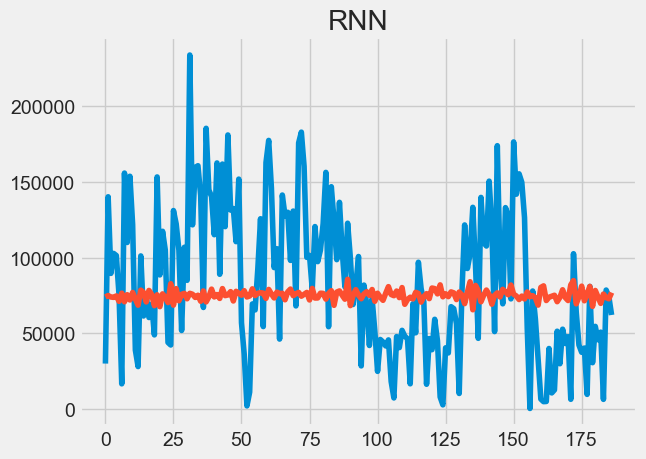

In [22]:
plt.title("RNN")
plt.plot(df_compare['Real Price'])
plt.plot(df_compare['Prediction'])